In [42]:
# các thu viện cần thiết
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
def loadData(path):
  '''
    Thực hiện đọc dữ liệu từ file .csv

    Input:
      path: str
        đường dẫn đến file .cvs cần đọc dữ liệu
    Output:
      data: ndarray, dtype=int64
        chứa data của dữ liệu
      label: ndrray, dtype=int64
        chứa nhãn của dữ liệu
  '''

  # load data
  df = pd.read_csv("train.csv")

  # truy xuat data values
  database = df.values

  # truy xuất data
  data = database[:,1:]
  # truy xuất label
  labels = database[:,0]

  # trả về data, label
  return data, labels

In [44]:
def data2Img(data):
  '''
    Thực hiện chuyển đổi cơ sở dữ liệu data ở dạng dòng thành data ma trận hình ảnh

    Input:
      data: ndarray, dtype=int64
        data chứa cơ sở dữ liệu dòng của hình ảnh
    Output:
      images: adarray, dtype=int8
        chứa ma trận các hình ảnh đã được chuyển đổi
  '''

  # khi doc vao la kieu int64 nen ta can chuyen ve du lieu uint8 (la kieu du lieu cua anh)
  data_t = data.astype(np.uint8)

  # convert ve ma tran 28x28 va luu vao list images
  images = []

  for _data in data_t:
      _data = _data.reshape(-1,28)
      images.append(_data)
  # bien list thanh numpy.narray
  images = np.array(images)

  # trả về tập hình ảnh
  return images

In [45]:
def showImgByLabel(images, labels, label, n):
  '''
    Thực hiện show hình ảnh theo label được cung cấp

    Input:
      images: ndarray, dtype=int8
        tập hình ảnh của cơ sở dữ liệu
      labels: ndarray
        tập nhãn của cơ sở dữ liệu
      label: type=int
        nhãn truyền vào muốn hiển hình ảnh (giới hạn 0 -> 24)
      n: type=int
        số lượng hình muốn hiển thị ở nhãn đó
    Output:
      out: hình ảnh được hiển thiện trên màn hình
  '''

  count = 0; # biến đếm tổng số hình
  for i in range(images.shape[0]):
    # kiểm tra label
    if labels[i] == label:
      # hiển thị hình ảnh lên màn hình
      plt.imshow(images[i], cmap="gray")
      plt.show()
      count += 1

    # kiểm tra đã đủ số hình chưa
    if count == n:
      break

In [46]:
  def trainStandardScaler(data):
    '''
      Đào tạo mô hình

      Chuẩn hóa các tính năng bằng cách loại bỏ giá trị trung bình và tỷ lệ theo phương sai đơn vị

      Điểm chuẩn của một mẫu x được tính như sau:

        z = (x - u) / s
      
      Input:
        data: ndarray
          data làm chuẩn cần training
      Output: 
        scaler: sklearn.preprocessing.StandardScaler
          model scaler đã được đào tạo
    '''

    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(data)

    return scaler

In [47]:
def saveModel(model, path):
  '''
  Lưu model đã được đào tạo

  Input: 
    model: 
      model được đào tạo cần lưu
    path: str
      đường dẫn cần lưu
  Output
    out: model được lưu ra file
  '''

  pickle.dump(model, open(path,'wb'))

In [48]:
def loadModel(path):
  '''
    Tải lên model từ file

    Input: 
      path: str
        Đường dẫn đến file chứa model 
    Output:
      model: biến chứa model
  '''

  # load model
  model = pickle.load(open(path,'rb'))  

  # trả về
  return model

In [49]:
def trainPCA(data, n):
  '''
    Đào tạo mô hình PCA

    Input:
      data: ndarray
        data cần đào tạo
      n: int
        số thành phần cần giữ lại
    Output:
      pca: sklearn.decomposition.PCA
        model PCA đã được đào tạo
  '''

  # Make an instance of the Model
  pca = PCA(n)

  # train
  pca.fit(data)

  return pca

In [50]:
def trainLogisticRegression(data, label):
  '''
    Đào tạo mô hình hồi quy Logistic

    Input:
      data: ndarray
        Data cần đào tạo
      label: ndarray
        Nhãn tương ứng với data
    Ouput:
      model: sklearn.linear_model.LogisticRegression
        model đã được đào tạo
  '''

  # all parameters not specified are set to their defaults
  # default solver is incredibly slow which is why it was changed to 'lbfgs'
  model = LogisticRegression(solver = 'lbfgs')

  # train
  model.fit(data, label)

  return model

In [51]:
def preprocessingData(data, label):
  '''
    Tiền xử lí dữ liệu data và nhãn tương ứng:
    data thì sử dụng 2 kĩ thuật (scaler, pca),
    label thì chuyển đổi kiểu dữ liệu

    Input:
      data: ndarray
        data cần tiền xử lí
      label: ndarray
        label cần tiền xử lí
    Output:
      data_new: ndarray
        data đã được xử lí
      label_new: ndarray
        label đã được chuyển đổi kiểu dữ liệu
  '''

  # chuyển đổi kiểu dữ liệu cho data thành float64
  data_new = data.astype(np.float64)
  # chuyển labels thành int8
  label_new = label.astype(np.int8)

  # sử dụng kĩ thuật scaler

  # load model scaler
  scaler = loadModel('scaler.pkl')

  # Apply
  data_new = scaler.transform(data_new)

  # sử dụng PCA

  # load model PCA
  pca = loadModel('pca.pkl')

  # Apply
  data_new = pca.transform(data_new)

  return data_new, label_new

In [52]:
def testLogisticRegression(data, label, model):
  '''
    Kiểm tra độ chính xác của mô hình hồi quy Logistic
    
    Input:
      data: ndarray
        data chứa dữ liệu
      label: ndarray
        nhãn của dữ liệu
      model: sklearn.linear_model.LogisticRegression
        model của hồi quy Logistoc
    Output: 
      out: phần trăm độ chính xác của mô hình
  '''

  # Predict for One Observation (image)
  sum = 0
  for i in range(data.shape[0]):
    if model.predict(data[i].reshape(1,-1))==label[i]:
      sum += 1

  print('Accuracy of the model on the %d test images: %d %%' % (data.shape[0], 100 * sum / data.shape[0]))  

In [53]:
# muont đên drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# di chuyển đến thư mục chứa data
%cd /content/drive/My Drive/colab/

/content/drive/My Drive/colab


In [55]:
# load dữ liệu
data, labels = loadData('train.csv')

In [56]:
data[0]

array([123, 124, 128, 133, 137, 143, 147, 151, 156, 159, 161, 165, 168,
       168, 169, 173, 176, 176, 178, 180, 181, 182, 181, 181, 183, 182,
       182, 182, 125, 126, 129, 134, 139, 144, 149, 152, 156, 159, 163,
       165, 168, 169, 171, 175, 177, 178, 179, 181, 183, 183, 183, 182,
       183, 184, 185, 185, 127, 128, 130, 136, 141, 146, 150, 154, 158,
       162, 165, 167, 169, 173, 174, 175, 179, 182, 182, 182, 183, 185,
       187, 187, 186, 187, 188, 187, 128, 130, 132, 137, 142, 148, 151,
       155, 160, 164, 166, 170, 171, 174, 175, 177, 179, 182, 183, 183,
       185, 188, 188, 187, 186, 188, 189, 189, 129, 131, 134, 139, 145,
       149, 153, 157, 161, 165, 168, 171, 174, 175, 178, 180, 180, 181,
       185, 187, 188, 188, 189, 189, 188, 189, 190, 190, 130, 132, 135,
       141, 146, 151, 154, 159, 164, 167, 170, 173, 175, 178, 180, 182,
       182, 184, 187, 188, 189, 190, 190, 191, 190, 191, 192, 192, 131,
       133, 136, 142, 148, 153, 157, 160, 165, 168, 170, 175, 17

In [57]:
# chuyển đổi data về dữ liệu hình ảnh grayscale
images = data2Img(data)

In [58]:
images[0]

array([[123, 124, 128, 133, 137, 143, 147, 151, 156, 159, 161, 165, 168,
        168, 169, 173, 176, 176, 178, 180, 181, 182, 181, 181, 183, 182,
        182, 182],
       [125, 126, 129, 134, 139, 144, 149, 152, 156, 159, 163, 165, 168,
        169, 171, 175, 177, 178, 179, 181, 183, 183, 183, 182, 183, 184,
        185, 185],
       [127, 128, 130, 136, 141, 146, 150, 154, 158, 162, 165, 167, 169,
        173, 174, 175, 179, 182, 182, 182, 183, 185, 187, 187, 186, 187,
        188, 187],
       [128, 130, 132, 137, 142, 148, 151, 155, 160, 164, 166, 170, 171,
        174, 175, 177, 179, 182, 183, 183, 185, 188, 188, 187, 186, 188,
        189, 189],
       [129, 131, 134, 139, 145, 149, 153, 157, 161, 165, 168, 171, 174,
        175, 178, 180, 180, 181, 185, 187, 188, 188, 189, 189, 188, 189,
        190, 190],
       [130, 132, 135, 141, 146, 151, 154, 159, 164, 167, 170, 173, 175,
        178, 180, 182, 182, 184, 187, 188, 189, 190, 190, 191, 190, 191,
        192, 192],
       [13

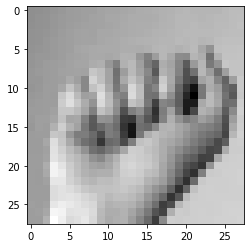

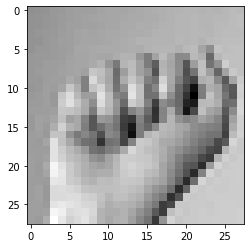

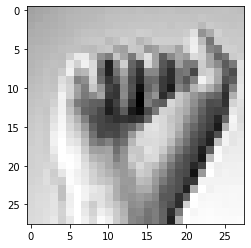

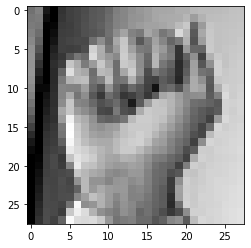

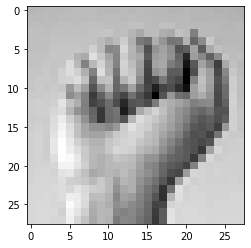

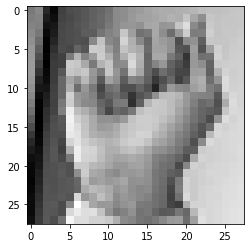

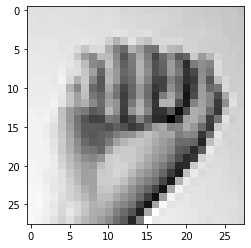

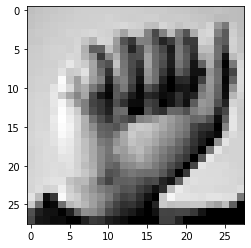

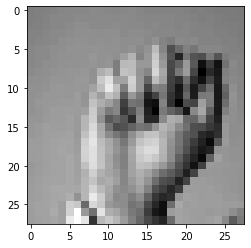

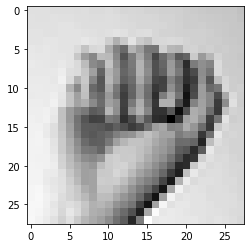

In [59]:
# hiển thị 10 tấm hình có label = 0
showImgByLabel(images, labels, 0, 10)

In [60]:
# chia tap du lieu thanh 2 phan: 80% train, 20% test
train_img, test_img, train_lbl, test_lbl = train_test_split(data, labels, test_size=0.2, random_state=1234)

In [61]:
print(train_img.shape)
print(train_img[0])

(21600, 784)
[ 99 110  35   8  54  63  66  71  79  83  93 112 115 122 126 132 136 139
 139 142 144 147 152 154 155 155 158 159 103 107  25  14  56  62  66  72
  79  86  95 111 114 124 130 131 135 139 144 140 158 134 115 159 155 158
 159 160 107 103  16  21  60  63  68  74  81  85  98 111 121 122 117 135
 137 121 123 158 177 112  96 162 156 159 159 160 111  98   9  25  61  64
  66  75  77  94 106 113 159 128  92  99 135 114  89 123 164 101 103 166
 156 160 160 162 116  88   5  32  61  64  68  65 111 156 110 103 169 141
 110  84 133 125 119  63 113 119  79 161 158 160 162 165 122  77   4  40
  63  59  82  70 163 162 126 103 157 145 136  88 132 130 117  71  68 128
  68 128 168 158 163 165 124  65   6  47  55 101 145 106 126 164 142 108
 140 165 143  82 135 135  99  80  44 125  91  93 169 160 165 166 125  55
   4  52  53 163 159 137  99 144 158 111 114 175 140  84 108 121  81  67
  50 123 115  81 163 165 165 168 126  43   9  51  72 159 153 160 123 100
 160 120  94 161 134  84  64  90  75  

In [62]:
import copy

# phục vụ cho việc đào tạo các mô hình scaler, PCA
data_copy = copy.copy(train_img)

# chuyển data về float64
data_copy = data_copy.astype(np.float64)

In [63]:
# đào tạo scaler
scaler = trainStandardScaler(data_copy)
# save model
saveModel(scaler, 'scaler.pkl')
# Apply transform
data_copy = scaler.transform(data_copy)

# ví dụ về một vector sau khi scaler
print(data_copy.shape)
print(data_copy[0])

# đào tạo PCA dựa trên data đã scaler
pca = trainPCA(data_copy, 400)
# save model
saveModel(pca, 'pca.pkl')

(21600, 784)
[-1.11836657e+00 -9.59813312e-01 -2.96986991e+00 -3.77080726e+00
 -2.75033770e+00 -2.63141824e+00 -2.68734807e+00 -2.70516050e+00
 -2.59663634e+00 -2.63167019e+00 -2.40254401e+00 -1.86973252e+00
 -1.82218558e+00 -1.64853571e+00 -1.56731616e+00 -1.41760649e+00
 -1.29365682e+00 -1.20733237e+00 -1.21512039e+00 -1.06994842e+00
 -9.59952183e-01 -7.95497497e-01 -5.46369161e-01 -4.15226406e-01
 -3.34985341e-01 -2.47313251e-01 -1.07284826e-01 -6.32399798e-02
 -1.05845207e+00 -1.07513686e+00 -3.23923136e+00 -3.65398837e+00
 -2.73596485e+00 -2.69105394e+00 -2.72371582e+00 -2.71560092e+00
 -2.64295509e+00 -2.55112177e+00 -2.37590794e+00 -1.91956635e+00
 -1.84436657e+00 -1.57169960e+00 -1.41120586e+00 -1.39325580e+00
 -1.28098608e+00 -1.18217497e+00 -9.97251852e-01 -1.15379116e+00
 -4.79391233e-01 -1.28610780e+00 -1.84500507e+00 -3.08374579e-01
 -3.79637763e-01 -2.06370549e-01 -1.29550669e-01 -8.10198774e-02
 -1.00212732e+00 -1.21874926e+00 -3.48467405e+00 -3.51139532e+00
 -2.65535636

In [64]:
print(len(scaler.var_))
print(scaler.var_)

784
[1715.9173185  1600.88107371 1529.63865062 1488.56013837 1379.36720909
 1312.29840044 1232.99968929 1137.54968299 1068.18583616  981.42019526
  937.99347029  888.11906085  859.23189316  820.56209807  783.68108711
  732.51877683  716.24635583  692.61132304  681.04042267  703.18718148
  725.99484671  777.14851659  861.80954793  953.74425185 1015.77416474
 1182.52766418 1296.94219773 1330.67928575 1732.33382523 1613.61799732
 1557.87393508 1496.49484797 1389.96087217 1330.22764691 1248.15508702
 1152.69341373 1075.29444437 1005.71844784  955.09301414  919.55245301
  901.81644628  871.68091542  836.00251757  808.11815926  784.94062237
  749.97810177  736.76868025  733.27694992  744.48124066  802.64116821
  875.95584614  964.09631944 1043.54467077 1190.01267322 1280.4903456
 1334.83451851 1750.88114444 1626.02909444 1583.92622083 1505.75699503
 1414.89142968 1357.61187377 1269.63696526 1169.654825   1116.70251848
 1073.30537486 1000.29352778  958.87281017 1012.48302593  986.82941872
 10

In [65]:
print(len(scaler.mean_))
print(scaler.mean_)

784
[145.32680556 148.40310185 151.15337963 153.48476852 156.14708333
 158.32486111 160.3637963  162.23851852 163.86615741 165.44398148
 166.58194444 167.72050926 168.41310185 169.22305556 169.87592593
 170.36763889 170.62185185 170.77398148 170.71069444 170.3725463
 169.86523148 169.17638889 168.03953704 166.82333333 165.67638889
 163.50458333 161.86365741 161.30689815 147.05416667 150.18810185
 152.85217593 155.35291667 158.00273148 160.14888889 162.22680556
 164.19828704 165.66694444 166.90388889 168.42643519 169.20916667
 169.38680556 170.40324074 170.80319444 170.60666667 170.88912037
 171.37472222 171.06888889 171.24361111 171.08027778 170.43662037
 169.60578704 168.575      167.2637963  165.11907407 163.63583333
 162.96009259 148.9325463  152.14490741 154.6850463  157.25648148
 159.88134259 162.07055556 163.97069444 166.1299537  167.42018519
 168.22462963 169.8800463  170.72763889 170.10333333 170.40268519
 169.68958333 168.76800926 168.96453704 169.20361111 169.29638889
 169.97

In [66]:
# tiền xử lí dữ liệu train
X_train, Y_train = preprocessingData(train_img, train_lbl)

In [68]:
print(X_train.shape)
print(X_train[0])

(21600, 400)
[ 3.30641882e+01 -9.73254989e+00 -8.21639824e+00 -4.17738125e-01
 -5.78824347e+00  6.60917986e-01  6.11302305e+00 -5.13934039e+00
 -2.30006228e+00 -6.63957242e+00  3.60859351e+00  2.94696786e+00
  2.15780649e-01 -4.49885630e+00  3.97064025e+00 -3.54574888e-01
  1.49040448e+00 -2.84230168e-01  1.02342860e+00 -1.28371349e-02
 -3.85763605e+00  3.37762566e+00 -1.37338345e+00  5.14274574e-01
  2.51265731e+00 -8.35483786e-02 -3.07229265e-01 -1.27521506e+00
 -2.62715883e+00 -2.39852049e-01  9.88084416e-01 -2.92300021e+00
  2.15170989e+00  1.29076642e+00  1.83766062e+00 -9.18499341e-01
  2.16289956e+00  2.94951858e+00  2.38565914e-01  6.24242528e-01
  1.79875136e+00  2.65646830e+00 -7.25022219e-02  2.02228236e+00
 -1.59004844e+00  2.30517825e+00  3.59544957e-01 -1.02657985e+00
 -3.44619914e-01  1.41760031e-01  1.83059796e+00  2.03566504e+00
 -1.13714625e-02 -2.88367741e+00  3.70826601e+00  1.00623467e-01
 -2.08432399e-01 -1.74007881e+00 -1.41777558e-01  1.67242589e+00
  5.69857657

In [69]:
# train mô hình hồi quy Logistic
model = trainLogisticRegression(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
# save model
saveModel(model, 'logistic.pkl')

In [71]:
# test model

# load model logistic
model_pre = loadModel('logistic.pkl')

# tiền xử lí dữ liệu test dựa trên scaler, PCA
X_test, Y_test = preprocessingData(test_img, test_lbl)

# tiến hành test với dữ liệu đã tiền xử lí
testLogisticRegression(X_test, Y_test, model_pre)

Accuracy of the model on the 5400 test images: 100 %


19 [19]


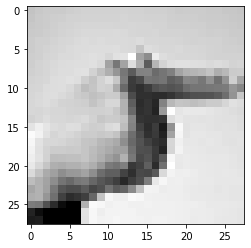

15 [15]


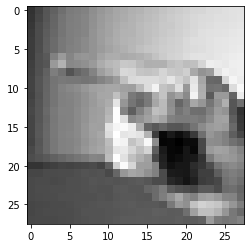

1 [1]


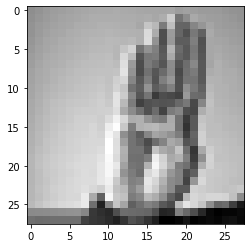

13 [13]


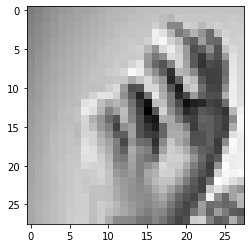

6 [6]


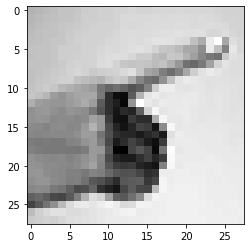

21 [21]


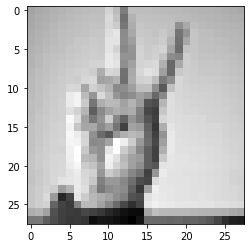

10 [10]


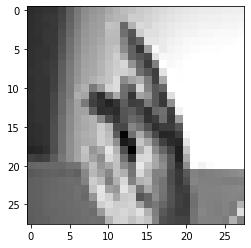

17 [17]


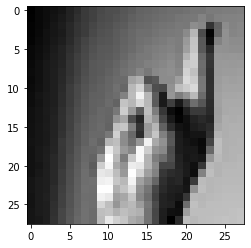

18 [18]


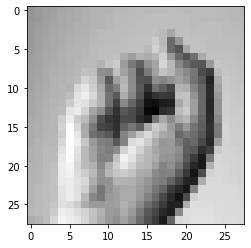

7 [7]


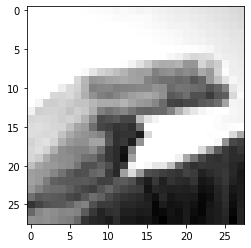

In [72]:
# kiểm tra thử 1 số hình
for i in range(10):
  # if model_pre.predict(X_test[i].reshape(1,-1)) != Y_test[i]:
  print(Y_test[i], model_pre.predict(X_test[i].reshape(1,-1)))
  plt.imshow((test_img[i].astype(np.uint8)).reshape(-1,28), cmap="gray")
  plt.show()

In [ ]:
# tiến hành test thực

path_test = 'test.csv'

# load data
X_test, Y_test = loadData(path_test)

# load model logistic
model_pre = loadModel('logistic.pkl')

# tiền xử lí dữ liệu test dựa trên scaler, PCA
X_test_pre, Y_test_pre = preprocessingData(X_test, Y_test)

# tiến hành test với dữ liệu đã tiền xử lí
testLogisticRegression(X_test, Y_test, model_pre)